In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from collections import Counter
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv
/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv
/kaggle/input/llm-detect-ai-generated-text/test_essays.csv
/kaggle/input/llm-detect-ai-generated-text/train_essays.csv
/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv


In [2]:
train_path = r'/kaggle/input/llm-detect-ai-generated-text/train_essays.csv'
train_df = pd.read_csv(train_path)
train_df


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [3]:
print(train_df['generated'].value_counts())

generated
0    1375
1       3
Name: count, dtype: int64


<Axes: ylabel='count'>

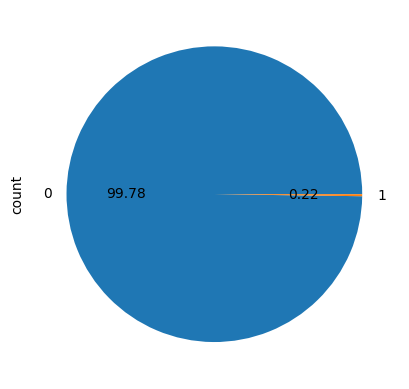

In [4]:
train_df['generated'].value_counts().plot.pie(autopct = '%.2f')

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_train_tf = count_vect.fit_transform(train_df["text"])

print("Shape of term-frequency matrix:", X_train_tf.shape)

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_tf)
print(X_train_tfidf)
X_train_tfidf = np.asarray(X_train_tfidf.toarray())
X_train_tfidf

Shape of term-frequency matrix: (1378, 16355)
  (0, 16326)	0.028664428002510223
  (0, 16295)	0.026532560651896884
  (0, 16225)	0.03899833356645695
  (0, 16181)	0.022275075889709704
  (0, 16129)	0.039404355465445254
  (0, 16115)	0.02391632479606156
  (0, 15999)	0.03568469307884198
  (0, 15996)	0.014222536983060554
  (0, 15960)	0.019284718002249818
  (0, 15903)	0.013784627501051647
  (0, 15872)	0.014211632912861035
  (0, 15825)	0.024609147025850268
  (0, 15485)	0.1099041424682003
  (0, 15478)	0.019889067531014788
  (0, 15457)	0.03681969027962959
  (0, 15432)	0.04879883274034297
  (0, 15301)	0.017688732242256536
  (0, 15245)	0.03884370003706912
  (0, 14839)	0.09512172703937144
  (0, 14758)	0.03346121433593529
  (0, 14684)	0.2395139939460885
  (0, 14650)	0.049321541690258444
  (0, 14608)	0.031377229970531106
  (0, 14548)	0.04584715203076843
  (0, 14536)	0.041066132113378825
  :	:
  (1377, 1775)	0.06448075616643686
  (1377, 1771)	0.03680532968128831
  (1377, 1768)	0.10425356118233375
  (137

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
test_path = r'/kaggle/input/llm-detect-ai-generated-text/test_essays.csv'
test_df = pd.read_csv(test_path)

sub_path = r'/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv'
sub_df = pd.read_csv(sub_path)


In [7]:
train_path_add = r'/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv'
train_df_add = pd.read_csv(train_path_add)
train_df_add

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False
...,...,...,...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44864,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44865,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44866,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True


In [8]:
X_train = train_df_add['text']
y_train = train_df_add['label']

X_test = test_df['text']
y_test = sub_df['generated']
print(y_test)

0    0.1
1    0.9
2    0.4
Name: generated, dtype: float64


In [9]:
all_texts = X_train + X_test
all_texts = [str(text) for text in all_texts]

from keras.preprocessing.sequence import pad_sequences

from keras.preprocessing.text import Tokenizer
# Tokenize the combined data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_texts)

# Convert texts to sequences
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a consistent length
max_len = max(max(len(seq) for seq in sequences_train), max(len(seq) for seq in sequences_test))
X_train_padded = pad_sequences(sequences_train, maxlen=max_len)
X_test_padded = pad_sequences(sequences_test, maxlen=max_len)



In [10]:
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=50, batch_size=16, validation_split=0.3)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/50
1963/1963 [==============================] - 9s 4ms/step - loss: 0.4199 - accuracy: 0.8277 - val_loss: 1.0819 - val_accuracy: 0.1077
Epoch 2/50
1963/1963 [==============================] - 9s 5ms/step - loss: 0.2656 - accuracy: 0.8894 - val_loss: 0.7854 - val_accuracy: 0.5919
Epoch 3/50
1963/1963 [==============================] - 7s 4ms/step - loss: 0.1695 - accuracy: 0.9491 - val_loss: 0.6292 - val_accuracy: 0.7256
Epoch 4/50
1963/1963 [==============================] - 7s 4ms/step - loss: 0.1271 - accuracy: 0.9609 - val_loss: 0.6022 - val_accuracy: 0.7588
Epoch 5/50
1963/1963 [==============================] - 7s 4ms/step - loss: 0.1075 - accuracy: 0.9672 - val_loss: 0.5717 - val_accuracy: 0.7840
Epoch 6/50
1963/1963 [==============================] - 7s 4ms/step - loss: 0.0968 - accuracy: 0.9705 - val_loss: 0.5618 - val_accuracy: 0.7964
Epoch 7/50
1963/1963 [==============================] - 7s 4ms/step - loss: 0.0899 - accuracy: 0.9721 - val_loss: 0.6559 - val_accuracy:

In [11]:

predictions = model.predict(X_test_padded)
print("Predictions:", predictions)

1/1 [==============================] - 0s 86ms/step
Predictions: [[0.80433357]
 [0.8168957 ]
 [0.81735057]]


In [12]:
submission = test_df[['id']]
submission['generated'] = predictions
print(submission)


         id  generated
0  0000aaaa   0.804334
1  1111bbbb   0.816896
2  2222cccc   0.817351


/tmp/ipykernel_19/1053630155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['generated'] = predictions


In [13]:
submission.to_csv('submission.csv',index = False)


In [14]:
#pd.read_csv(r'/kaggle/working/submission.csv')